# L5

Na tych ćwiczeniach:
    * Omówimy bias-variance
    * Omówimy ewaluacje
    * Zdefiniujemy co mamy na myśli mówiąc "regularyzacja"
    * Omówimy związek tradycyjnej regularyzacji z wnioskowaniem Bayesowskim 

Omówiliśmy podejście Bayesowskie, aż do prawdziwego postawienia bayesowskiej regresji liniowej.

Zapomnijmy na chwile o tym wszystkim.

<img width=500 src="figures/L5/plane.jpg">

## Bias variance

(też pojawia się na rozmowach kwalifikacyjnych)


Wyobraźmy sobie hipotetyczny proces:

1. Wylosuj dane 
2. Dopasuj regresje liniową do danych

Zwykle mamy jedną wersję danych, ale żeby mówić o bias variance, musimy mówić o rozkładzie z jakiego pochodzą dane.

Każda rzutka to nauczenie modelu na nowym sample'u danych. Środek to najlepszy model.

<img width=350 src="figures/L5/bias_variance.png">

### Poziom 1 wtajemniczenia

1. Samplujemy punkty z rozkładu sinus + szum. 
2. Fitujemy regresje liniową jak na L4 
3. Wracamy do 1 i rysujemy wynik dla paru iteracji

In [ ]:
# Przydatne funkcje

def f(size):
    '''
    Returns a sample with 'size' instances without noise.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    Returns a sample with 'size' instances.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + pl.randn(x.size)
    return (x,y)

def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    
    # To juz umiemy sami zaimplementować!
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

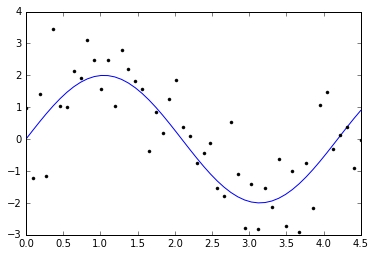

In [6]:
pl.clf()
f_x, f_y = f(50)
pl.plot(f_x, f_y)
x, y = sample(50)
pl.plot(x, y, 'k.')

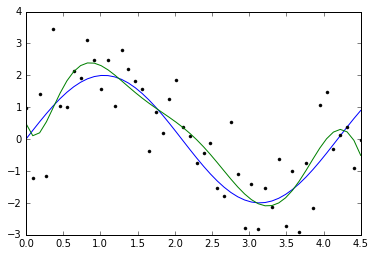

In [7]:
model = fit_polynomial(x, y, 8)
p_y = apply_polynomial(model, x)
pl.plot(f_x, f_y)
pl.plot(x, y, 'k.')
pl.plot(x, p_y)

## Cwiczenie 1 [2 pkt]

Napisz kod, ktory liczy bias, variance oraz MSE dla różnych wartości K.

Oczekiwany wynik: 

<img src="figures/L5/L5_1_wynik.png">

In [9]:
for k in range(1, 9):
    model = fit_polynomial(x, y, K)
    bias = ...
    variance = ...
    mse = ...
# Plot

SyntaxError: invalid syntax (<ipython-input-9-3d2adfa23168>, line 3)

### Poziom 2 wtajemniczenia

Ref: https://en.wikipedia.org/wiki/Estimator

Zdefiniujmy dowolny estymator, np:

* $mean(x_1, \ldots, x_n) = \frac{1}{n} \sum x_i$
* $cov(x_1, \ldots, x_n) = \frac{1}{n-1} \sum x_i^T x_i$

## Regularyzacja

## Regularyzacja - podejście "praktyczne"

Zwykle jednak kiedy wymyślamy nowe regularyzacje

## Podejście Bayesowskie a regularyzacja